In [1]:
import joblib 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
filepath=r"C:\Users\CSIO\Desktop\Diabetic Foot Research\Machine Learning Implementation\dataset_with_4_classes\combined_data\final.csv"
data=pd.read_csv(filepath)
data

,MTK1.T,MTK2.T,MTK3.T,MTK4.T,MTK5.T,D1.T,L.T,C.T,max_temp,min_temp,temp_range,condition
0,0.983221,1.579631,1.926185,2.091407,1.760453,0.619983,1.272439,0.915525,2.091407,0.619983,1.471423,0
1,0.125197,0.094649,0.608958,0.700101,1.500195,0.227996,1.762956,2.435764,2.435764,0.094649,2.341115,0
2,0.335517,0.938675,0.493425,0.343672,1.189942,1.257875,1.669362,1.263756,1.669362,0.335517,1.333844,0
3,0.343761,0.276866,0.537738,0.246287,1.398624,1.630739,0.438513,0.423720,1.630739,0.246287,1.384452,0
4,0.704690,1.595115,1.218438,0.859128,1.165247,0.722619,1.235193,3.400332,3.400332,0.704690,2.695642,1
...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.572060,0.651480,0.323167,2.548236,1.137525,3.652500,0.942357,0.385682,3.652500,0.323167,3.329333,1
74,1.643545,2.232720,2.246896,1.983081,1.971958,1.429466,1.704914,1.288972,2.246896,1.288972,0.957924,0
75,0.381049,1.013439,0.216111,0.816165,1.821659,1.642428,1.033259,0.374977,1.821659,0.216111,1.605548,0
76,0.609831,0.426914,1.071384,1.597074,2.917671,0.594115,3.530871,2.749073,3.530871,0.426914,3.103957,1


In [3]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=['condition'])
y=data['condition']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [4]:
ensemble_model=joblib.load('./ensemble_model.h5')
lgbm_model=joblib.load('./lightgbm_model.h5')

In [5]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('ensemble',ensemble_model ),
        ('lgbm', lgbm_model),
    ],
    voting='hard'# or 'soft' if models give probabilities
)

ensemble.fit(X_train, y_train)
ensemble_acc = ensemble.score(X_test, y_test)
print("Ensemble test accuracy:", ensemble_acc)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.750 total time=   0.0s
[CV 2/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 3/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 4/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 5/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.714 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.750 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.714 total time=   0.0s
[CV 1/5] END C=0.1

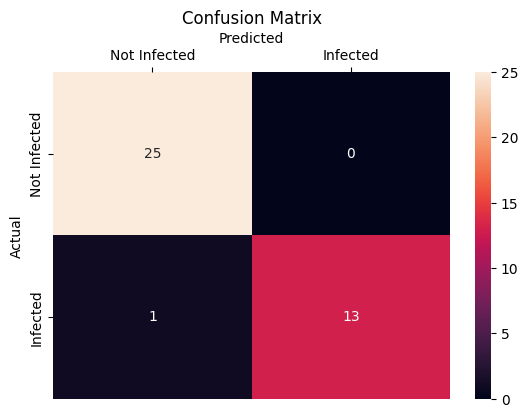

Accuracy: 97.436
Precision: 100.000
Sensitivity (Recall): 96.154
F1-Score: 98.039


In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
actual=y_test
predicted=ensemble.predict(X_test)
cm=confusion_matrix(actual,predicted)

sns.heatmap(cm,annot=True,fmt='g',
           xticklabels=['Not Infected', 'Infected'],
           yticklabels=['Not Infected', 'Infected'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print the results
print(f"Accuracy: {accuracy*100:.3f}")
print(f"Precision: {precision*100:.3f}")
print(f"Sensitivity (Recall): {recall*100:.3f}")
print(f"F1-Score: {f1_score*100:.3f}")

In [8]:
import warnings
warnings.filterwarnings("ignore")
#failed 
values=[[3.1,2.2,0.3,0.4,0.5,0.6,0.7,0.8,3.1,0.3,2.8]]
cond=ensemble.predict(values)
print(cond)

[0]
